# Decision Trees

Another learning algorithm that is very powerful and can be used in many applications called *decision trees* and *tree ensembles*. Despite all the successes of decision trees, they somehow haven't received that much attention in academia, and so you may not hear about decision trees nearly that much, but it is a tool well worth having in your toolbox. 

Suppose you are running a cat adoption center and given a few features, you want to train a classifier to quickly tell you if an animal is a cat or not.

Suppose I have ten animals that I want to classify as cats or not-cats, and my features are 

- shape of the ears
- shape of the face
- whether or not there are whiskers

And my target label is binary, where 0=not a cat, and 1=cat.

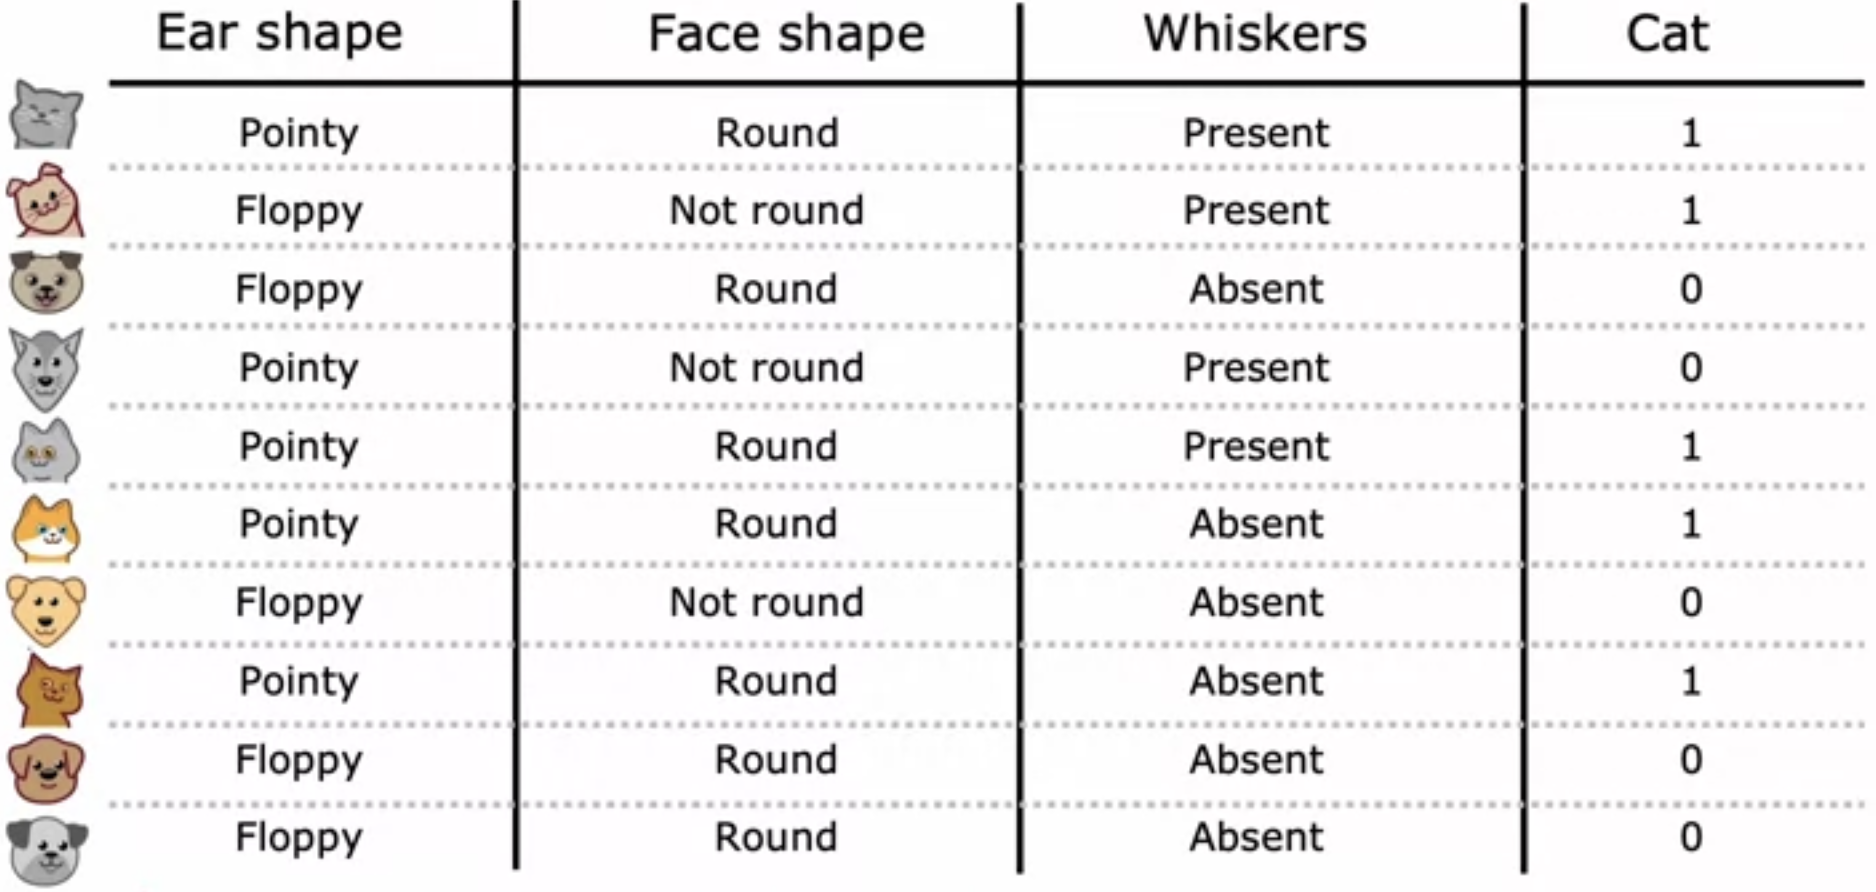

As always, we will call our input features our $x$'s, and our target feature (output) $y$.  So we have $x_1$, $x_2$ and
$x_3$.

What's a little bit different about this example is the input features take on **categorical** values.  In all of our examples
so far with linear regression, logistic regression, and neural networks, our input features have all been **numeric**.

In particular, right now our input features only take on 2 possible values, but we'll see later how to expand this idea to larger numbers
of possible values as well.

## What is a decision tree?

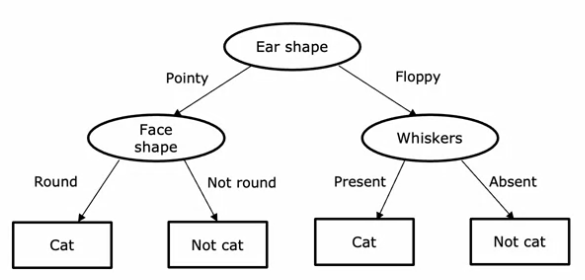

Here's an example of a model that you might get after training a decision tree learning algorithm on the data set that you just saw. 

The way this model works is if you have a new test example, say, a new animal where the ear-shape is pointy, face shape is round, and whiskers are present. The way this model will look at this example and make a classification decision is we'll start with this example at this topmost node of the tree (the root node), and we will look at the feature written inside, which is ear shape. Based on the value of the ear shape of this example we'll either go left or go right. The value of the ear-shape with this example is pointy, and so we'll go down the left branch of the tree and end up at the next oval node. We then look at the face shape of this example, which turns out to be round, and so we will follow this arrow down to the next level. The algorithm will make a prediction that it thinks this is a cat. 

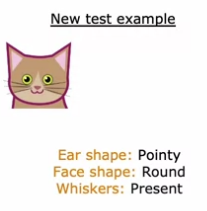

Ovals are called **decision nodes** and the boxes are called **leaf nodes**.

This is just one possible decision tree for this binary classification problem, there are many other possible trees!  Just like in the previous algorithms we've studied, there can be many possible instances of a model that a learning algorithm might create (just like linear regression might output different lines, and neural network training might create different neural networks).

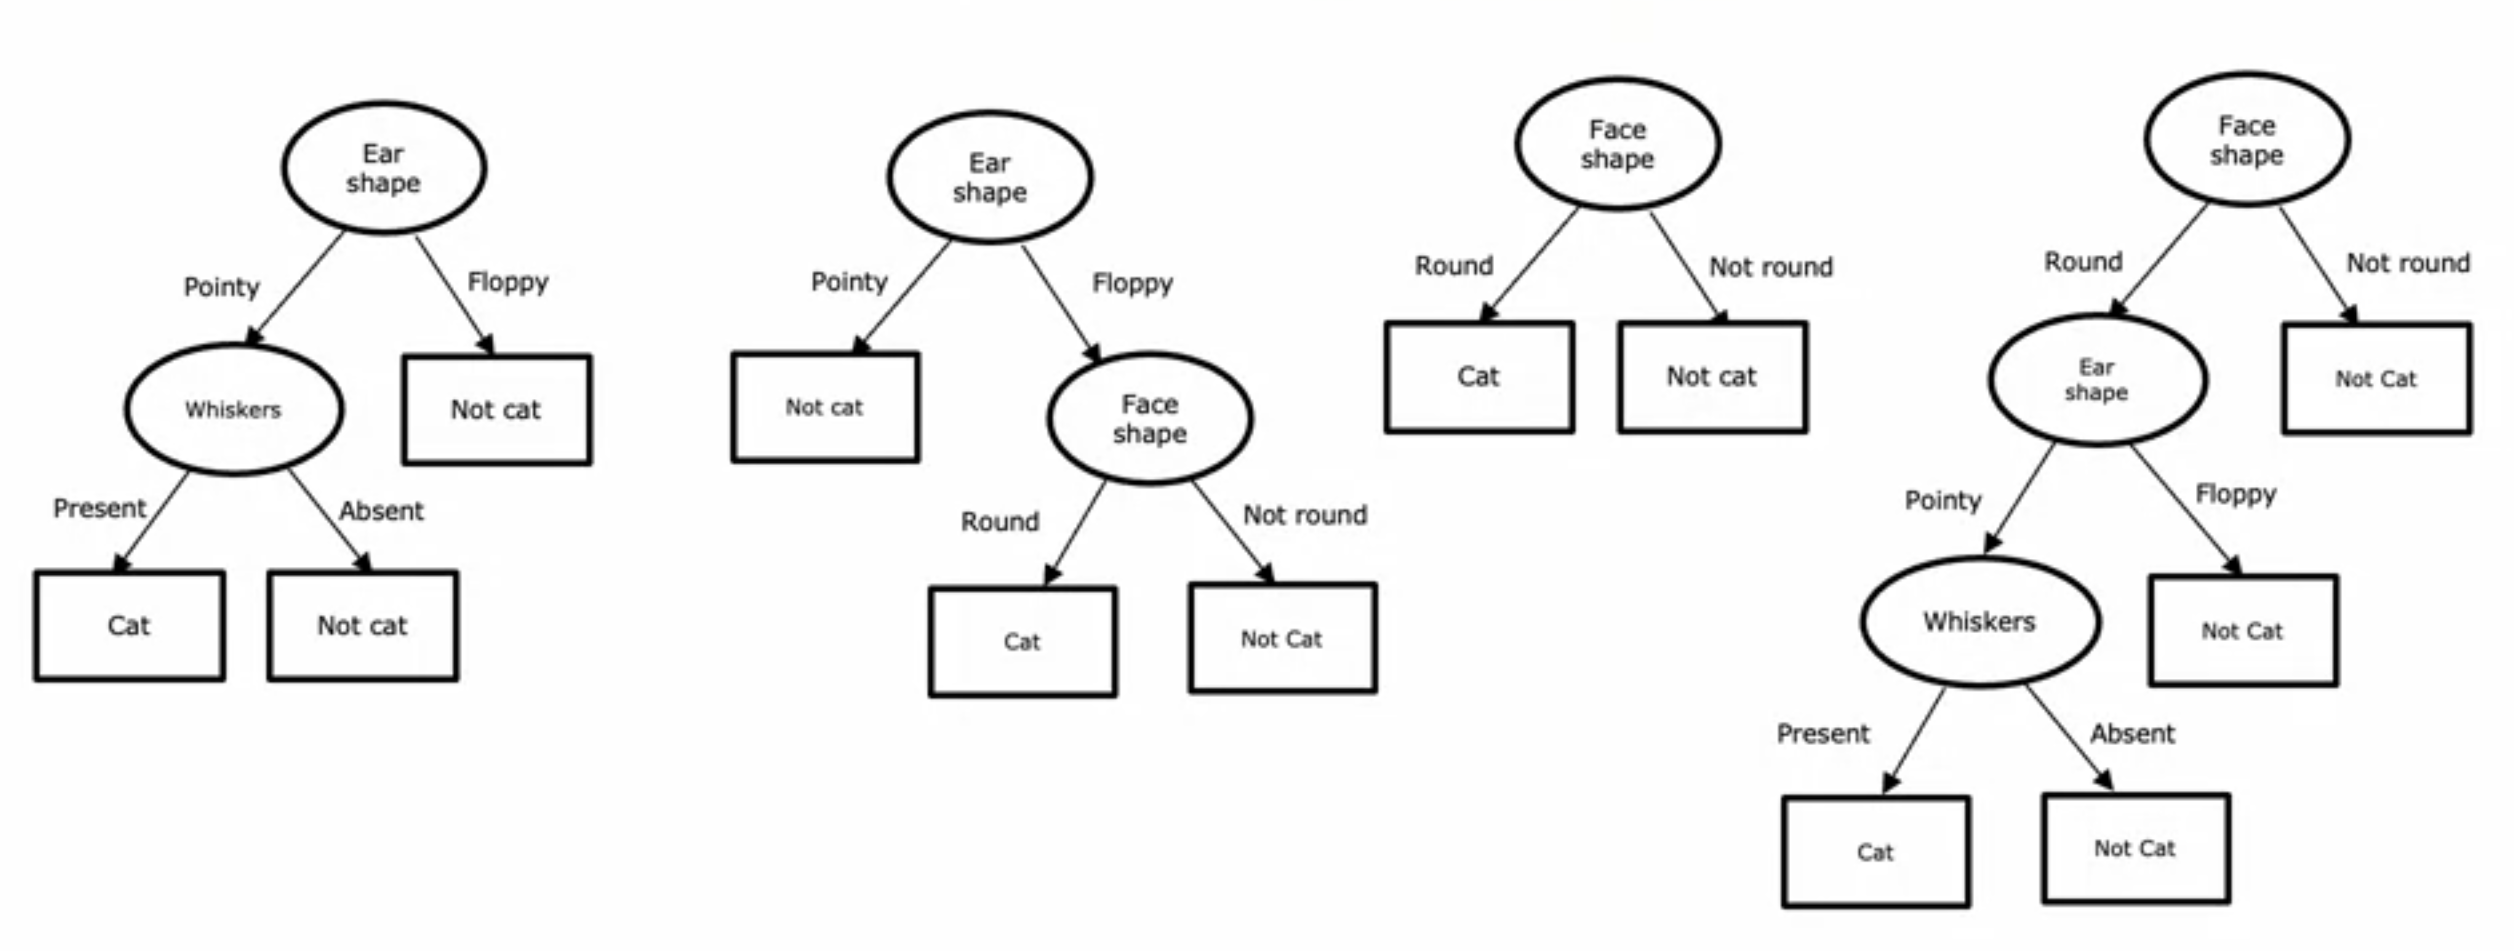

Among these different decision trees, some will do better and some will do worse on the training sets or on the validation and test sets. The job of the decision tree learning algorithm is, out of all possible decision trees, to try to pick one that hopefully does well on the training set, and then also ideally generalizes well to new data such as your validation and test sets as well. 



## Learning Process

Suppose are given a training set of 10 cats and dogs.  The first step of decision tree learning is to decide what feature to use
at the root node.

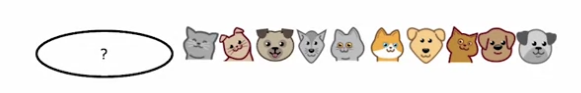

Later on, we will learn an exact algorithm for computing the "best" feature to use, but for the moment, let's say we decide to use
ear shape as our feature at the root node of our decision tree.

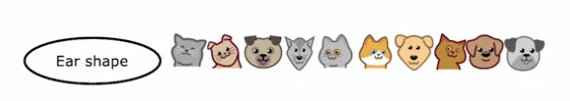

What that means is we will decide to look at all of our training examples, all 10 examples shown here, and split them according to the value of the ear shape feature. In particular, let's pick out the five examples with pointy ears and move them down the tree to the left. Let's pick the five examples with floppy ears and move them down to the right. 

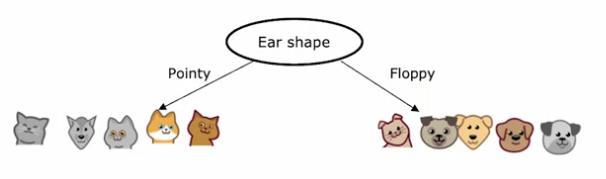

Now let's examine the left branch.  We are faced with the same decision --- what feature that we want to split on or what feature do we want to use next?  Let's say we decide to use the face shape feature. What we'll do now is take these five examples and split them into two subsets based on their value of the face shape. We'll take the four examples out of these five with a round face shape and move them down to the left. The one example with a not-round face shape and move it down to the right.

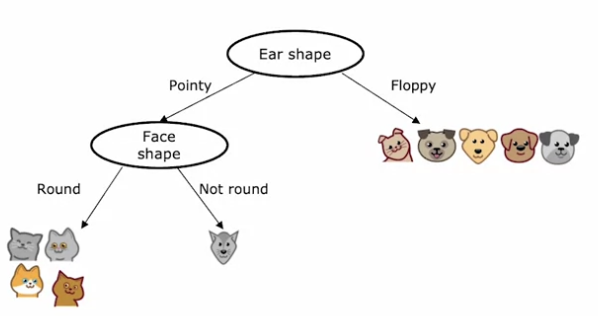

Finally, we notice that at our current node on the left, we have all four examples as cats. Rather than splitting further, we will create a leaf node that makes a prediction that if we get down to that level, we will just predict "cat.". On the right, we notice the same thing: all of the examples (just one is left) are dogs.  We can create a leaf node here that makes a prediction of "not-cat." 

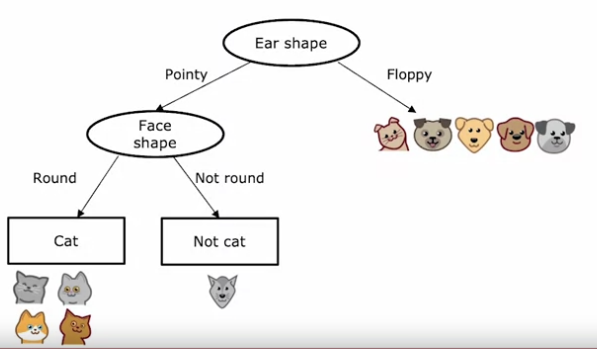

We repeat the same process on the right branch of the tree.  Let's say we pick to split on the feature "whiskers."

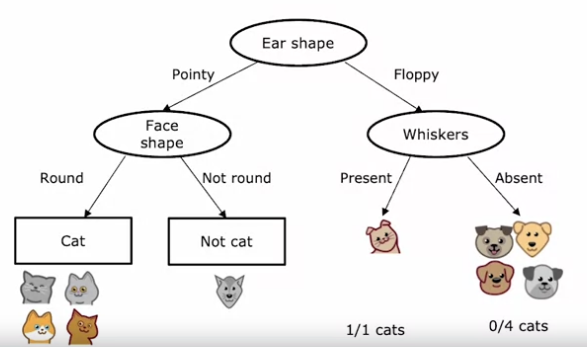

We notice again that after this split, we are left with training examples at the two nodes that are all of one class each.  So we turn 
them into leaf nodes.

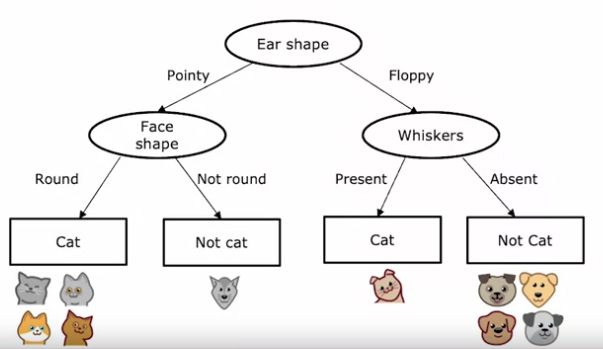

## Key decisions 

There are a few important decisions we must make when constructing a decision tree.

- **How do we choose what feature to split on at each node?**

It turns out we want to pick a splitting feature that will maximize what is called *purity*, or minimize *impurity*.  We will define
these terms below, but basically purity is a measure of the ratio of one class to the other class at a node.  So whenever we need to pick
a feature to split on, the criteria will be, "Which feature will make the two subsets as close to all-cats and all-dogs as possible?"

For example, if we had a feature called "Has cat DNA" that would be a really great feature to use.  Unfortunately, we don't have access to such
a feature :(

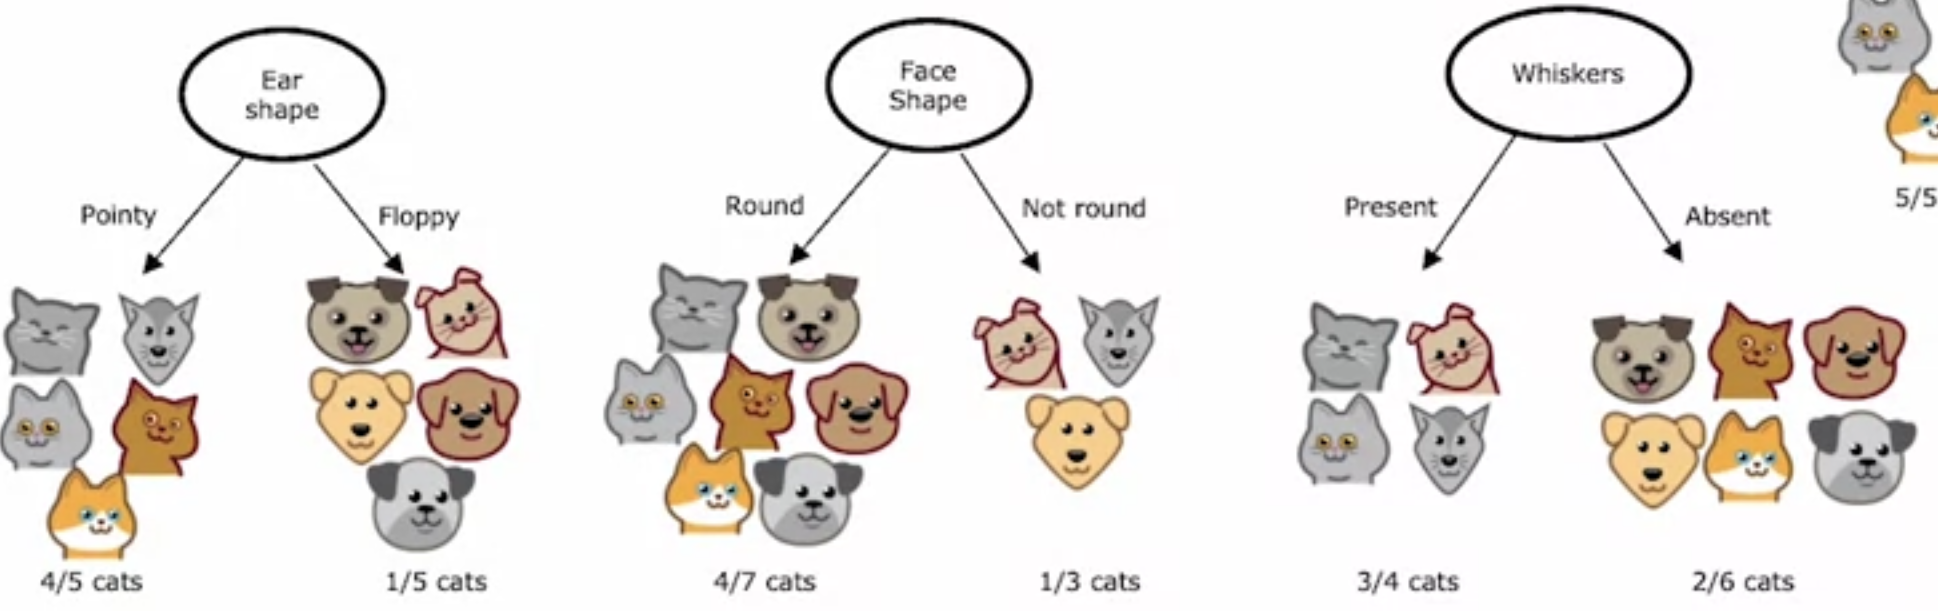

In the next section, we will see how to mathematically determine the purity/impurity of these possible splits above.

- **When do you stop splitting a node?**

In our example, we stopped splitting when we reached a situation where a node was 100% one class.

However, it's also common to stop splitting when the current branch of the tree reaches some pre-determined depth.  This helps 
control overfitting.  Plus, smaller trees are also usually easier to interpret.

A third criteria is sometimes splitting will only make very small improvements in purity score, or it's possible a split could
actually decrease purity.  So we might choose to not split a node further in these situations.

Lastly, if the number of training examples left at a node is below a certain threshold, we might choose to stop splitting
at that node.  This also prevents overfitting.

## Measuring purity

We need a way to quantify purity.   
If a set of animals includes all cats of a single class then that's very pure, if it's all "not cats" that's also very pure, but if it's somewhere in between how do you quantify how pure the set of examples is?

We do this through something called **entropy**, which is used to measure the amount of "uncertainty" in a random variable or probability
distribution (don't worry if you don't know anything about random variables or probability distributions).

### Entropy measures impurity

Suppose we have a data set of 3 dogs and 3 cats.  Define $p_1$ = the fraction of examples that are cats (the fraction with the class label 1, that's where the subscript on $p_1$ comes from).

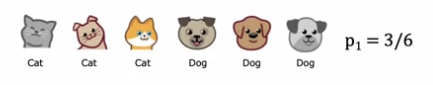

We will measure entropy --- which is a measure of how impure a data set is --- through a function usually denoted as $H(p_1)$.
For our data set that is equally split between dogs and cats, $H(3/6) = H(0.5) = 1$.  This is the maximum value this function can take; entropy
can never be greater than 1.

For a data set that was all one class, either all dogs or all cats, the entropy would be zero: $H(0/6) = H(0) = 0$ and also 
$H(6/6) = H(1) = 0$.

The general definition of the entropy function is:

$$H(p_1) = -p_1  \log_2(p_1) - (1-p_1)  \log_2(1-p1)$$

It is not a coincidence that this looks a lot like our cross-entropy loss function that we used in logistic regression.


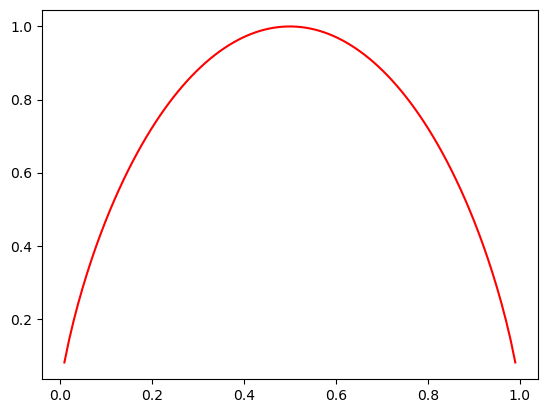

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def entropy(p1):
    return -p1 * np.log2(p1) - (1-p1) * np.log2(1-p1)

x_points = np.linspace(0.01, 0.99, 100)
y_points = [entropy(x) for x in x_points]

plt.plot(x_points, y_points, c='red')
plt.show()

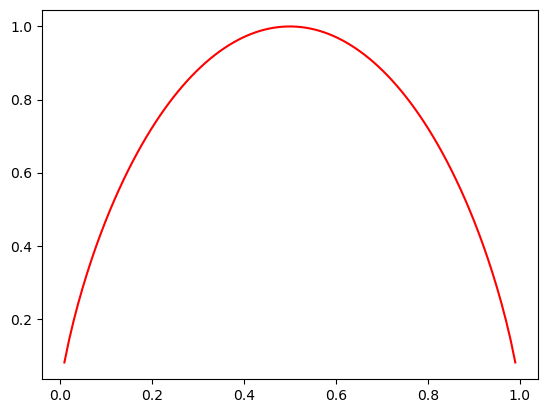

In [10]:
# Or you can use:

from scipy.stats import entropy as scipy_entropy

x_points = np.linspace(0.01, 0.99, 100)
y_points = [scipy_entropy([x, 1-x], base=2) for x in x_points]

plt.plot(x_points, y_points, c='red')
plt.show()

### Notes on this function

Note that the entropy function is maximized at $p_1 = 1/2$ and minimized at $p_1=0 \text{ or } 1$.

Also note that we are using the base-2 logarithm here, rather than the natural log.  Using another base (like $e$ or 10) is ok, it 
just scales the $H$ function up or down but doesn't change its shape.

(Side note: The "H" in the entropy function definition is not actually the letter "H", but the uppercase Greek letter eta, which was
chosen for the word entropy.)

When you compute this function, problems occur when you try to use $p_1 = 0$ or 1, because then there will be a $\log(0)$ computation.
(You might have noticed this in project 2.)  By convention, we define $0\cdot \log(0) = 0$ for this computation.

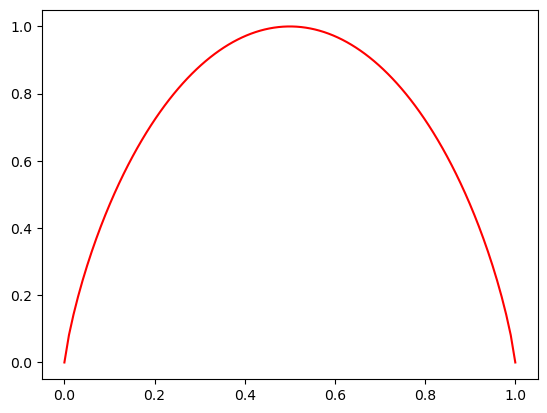

In [15]:
# Code to make this happen

def entropy(p1):
    if p1 == 0 or p1 == 1:
        return 0
    else:
        return -p1 * np.log2(p1) - (1-p1) * np.log2(1-p1)

x_points = np.linspace(0.00, 1, 100)
y_points = [entropy(x) for x in x_points]

plt.plot(x_points, y_points, c='red')
plt.show()

## Choosing a split: information gain

When building a decision tree, the way we'll decide what feature to split on at a node will be based on what choice of feature reduces entropy the most. Reducing entropy = reducing impurity = maximizing purity. In decision tree learning, the reduction of entropy is called **information gain.**

Let's look at the following scenario.  Imagine we have our original data set of 10 animals, 5 dogs and 5 cats.  We want to pick an 
attribute to split on for the root node.

There are three options, ear shape, face shape, and whiskers:

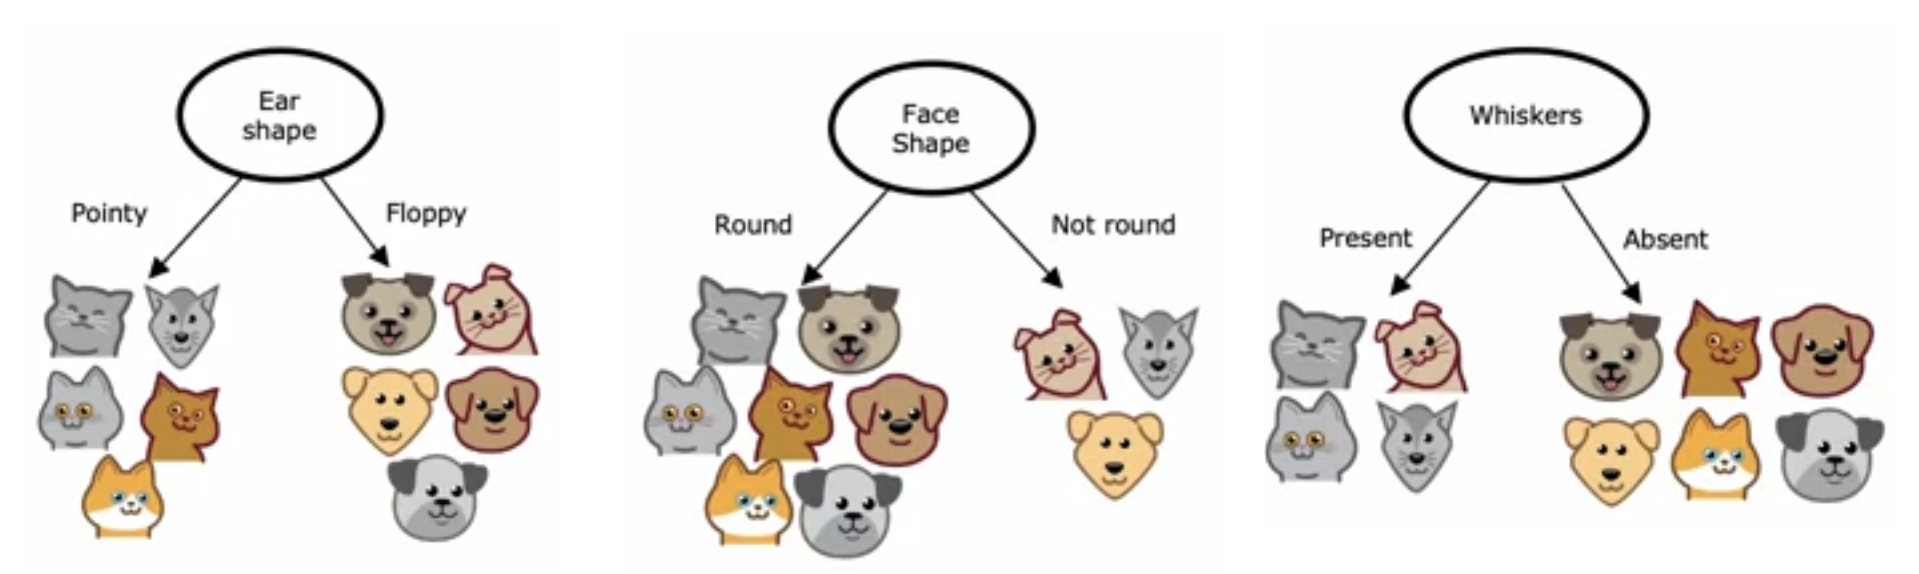



We can compute the $p_1$ values and entropy ($H$) values for each of these potential splits:

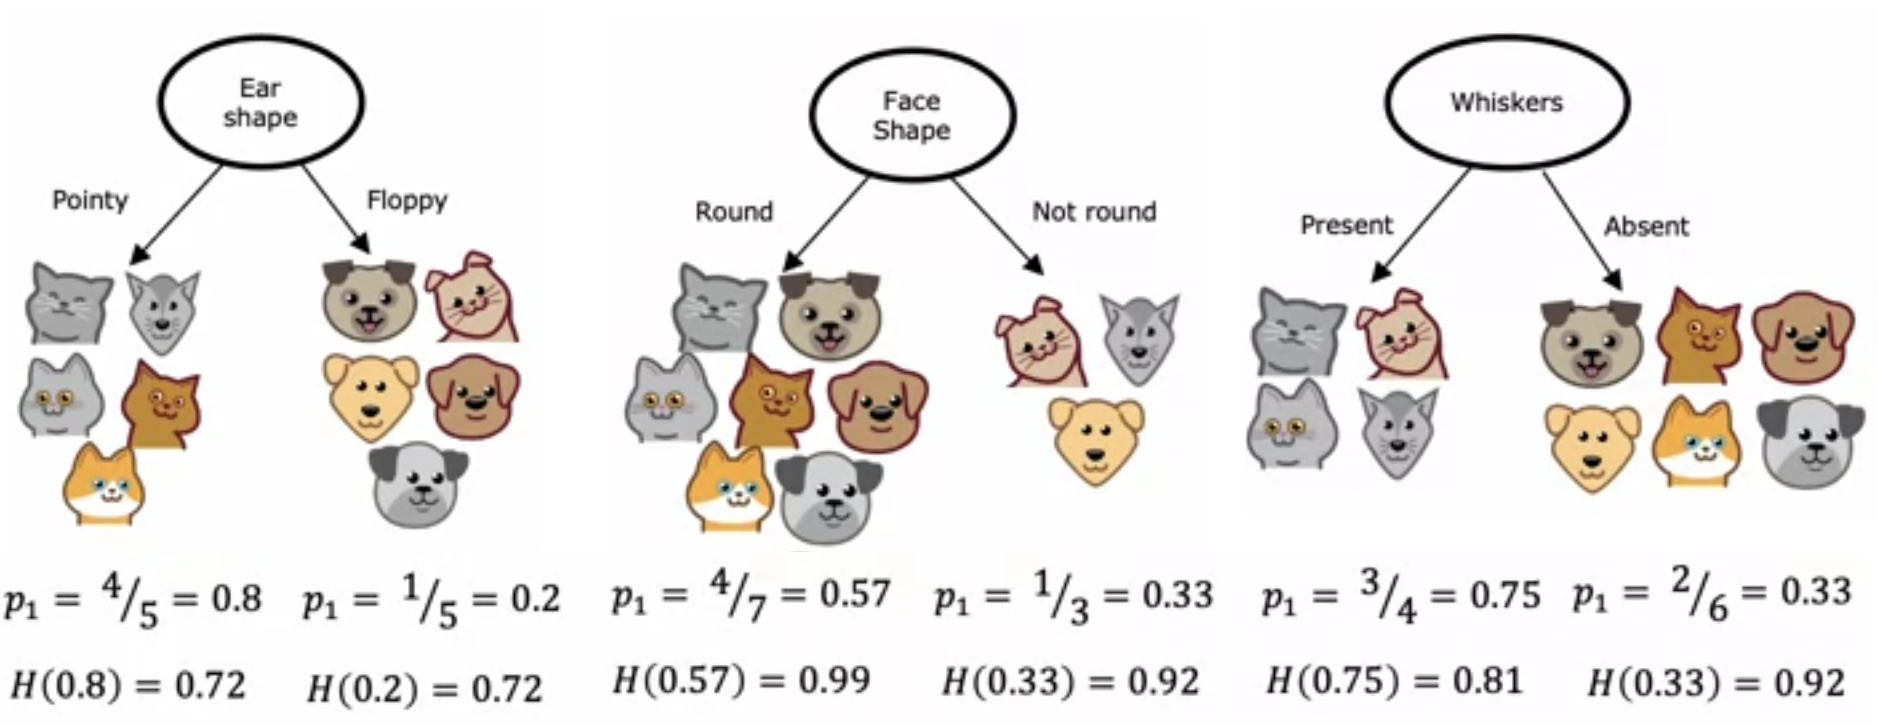

The $p_1$ values are the proportion/probability of cats in each subset.  So in the left-most group, $p_1=4/5$ because
there are 4 cats in the group, and 1 dog.

Note that each potential split results in 2 $p_1$ values, and therefore 2 entropy values.

Remember we want to somehow use these numbers to evaluate each potential split, and pick the "best" one.  Since each potential split
is represented by two numbers, it would be nice to combine each pair of numbers into one so we can more easily evaluate which one is best.

To do this, we use a weighted average.  Recall that we want entropy to be low (nodes with all dogs or all cats, or at least mostly dogs or mostly cats). If there's a node with a lot of examples in it with high entropy (a balanced mix of dogs and cats), that seems worse than if there was a node with just a few examples in it with high entropy.  This is because entropy, as a measure of impurity, is worse if you have a very large and impure dataset compared to just a few examples on a branch of the tree that is very impure.

So we weight each entropy value by the proportion of the data set at that node.  For instance, for the ear shape node, this would split the data into a group of five and another group of five.  So we weight the two entropy values (which happen both to be 0.72) by the fraction 5/10.

$$\text{weighted average of ear shape split} = \frac{5}{10}H(0.8) + \frac{5}{10}H(0.2) \approx 0.72$$

In [19]:
ear_shape_entropy = (5/10) * entropy(4/5) + (5/10) * entropy(1/5)
print(ear_shape_entropy)

0.7219280948873623


For face shape, we weight the two entropies by 7/10 and 3/10:

In [23]:
face_shape_entropy = (7/10) * entropy(4/7) + (3/10) * entropy(1/3)
print(face_shape_entropy)

0.965148445440323


For whiskers, we weight the two entropies by 4/10 and 6/10:

In [24]:
whiskers_entropy = (4/10) * entropy(3/4) + (6/10) * entropy(2/6)
print(whiskers_entropy)

0.8754887502163469


We can also calculate the entropy at the three different potential root nodes.  These would all have
the same data set of 5 dogs and 5 cats, so they all have $H(5/10) = 1$.

In [26]:
root_entropy = entropy(5/10)
print(root_entropy)

1.0


The formula we will use to pick the best split is called **information gain**, which is defined
as the difference between the entropy at a node and the entropy at that node's parent node.

In [27]:
print(root_entropy - ear_shape_entropy)
print(root_entropy - face_shape_entropy)
print(root_entropy - whiskers_entropy)

0.2780719051126377
0.034851554559677034
0.12451124978365313


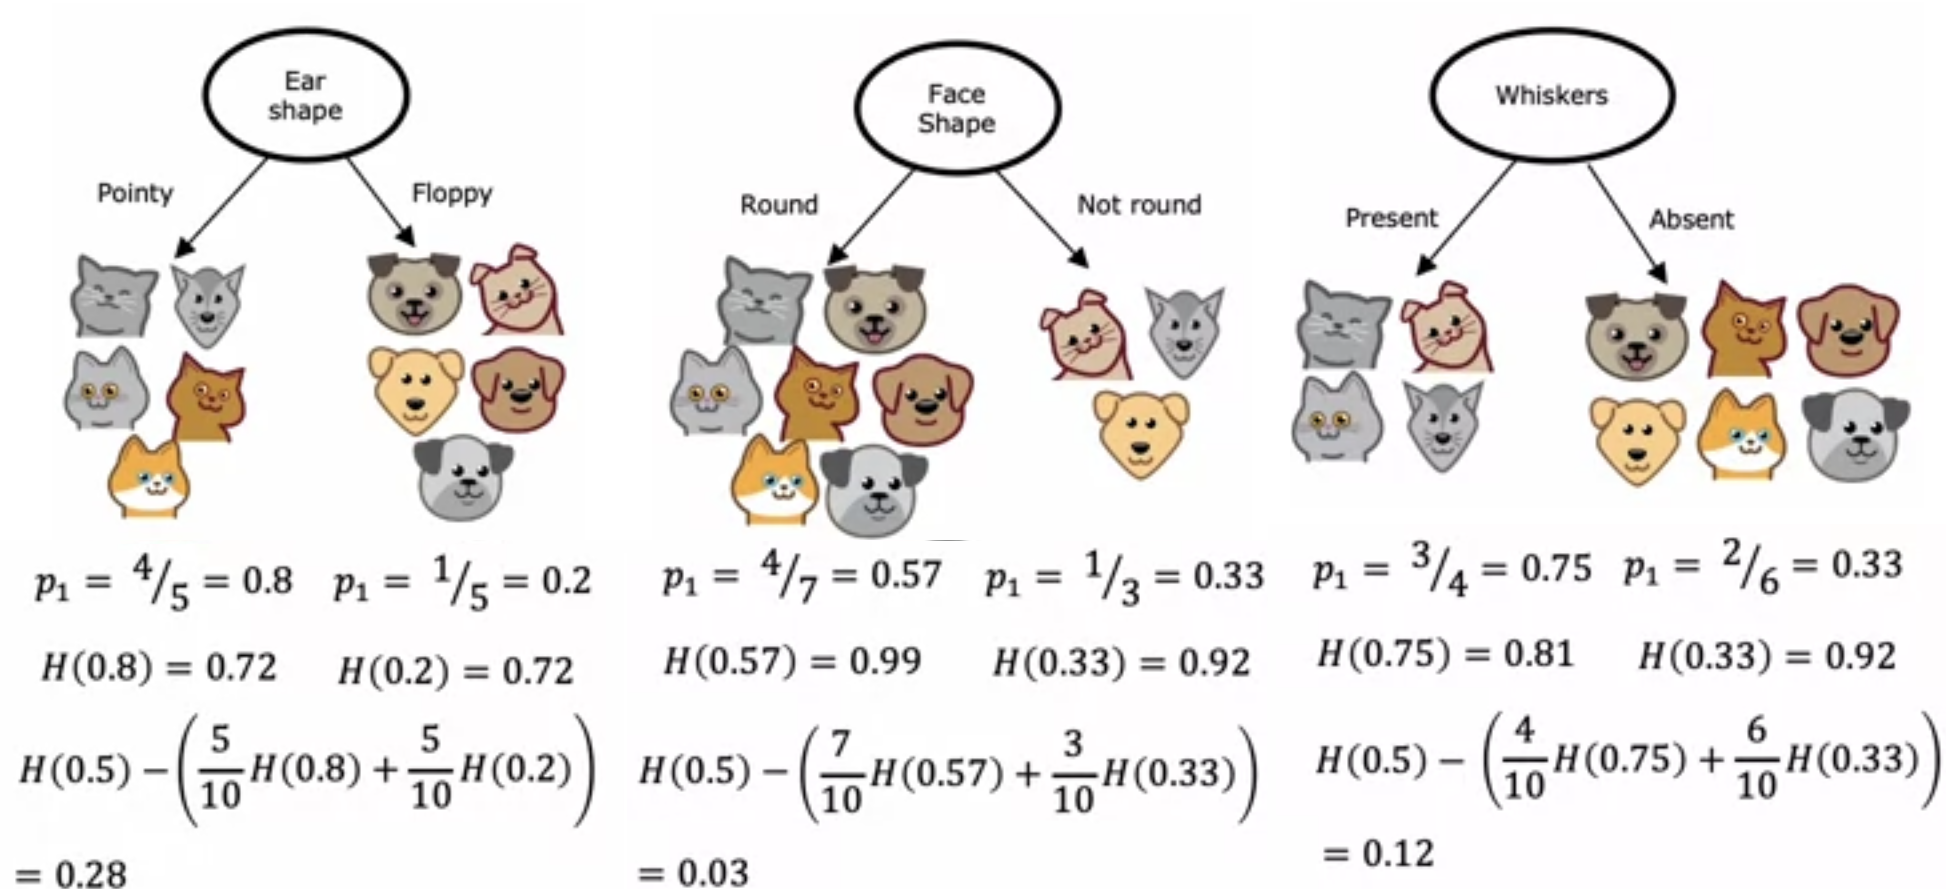

So the 0.28, 0.03, and 0.12 values are called the information gain.  It measures the reduction in entropy
from each potential split.

We prefer this metric (information gain) rather than just directly using entropy because one of the criteria for stopping splitting
a node is if the information gain is too small.  This wouldn't work with entropy directly; we need the *difference* in entropy values.

**Because ear shape gives us the biggest information gain (biggest reduction in entropy), this is the feature we would choose to split on
at the root node.**

## Notation

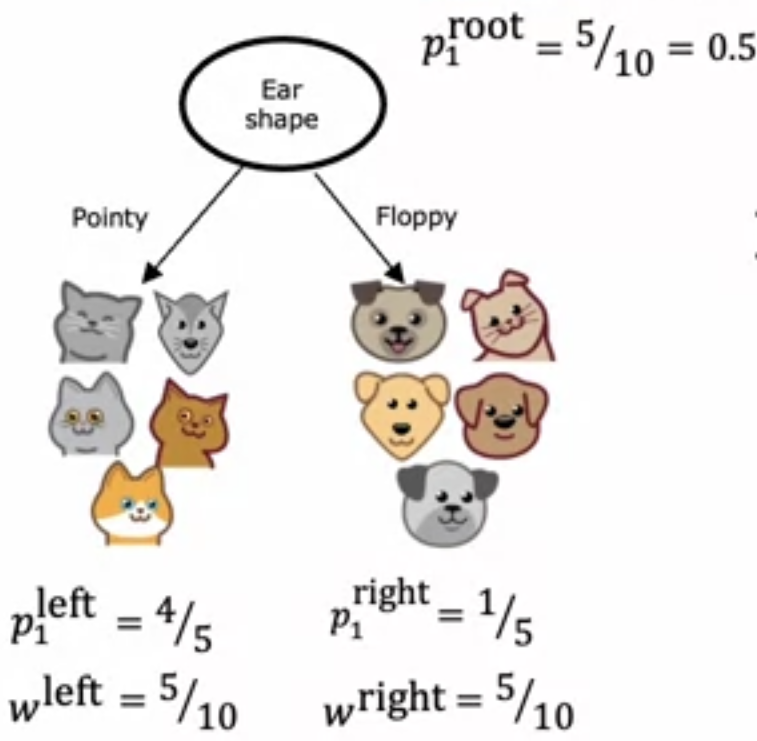

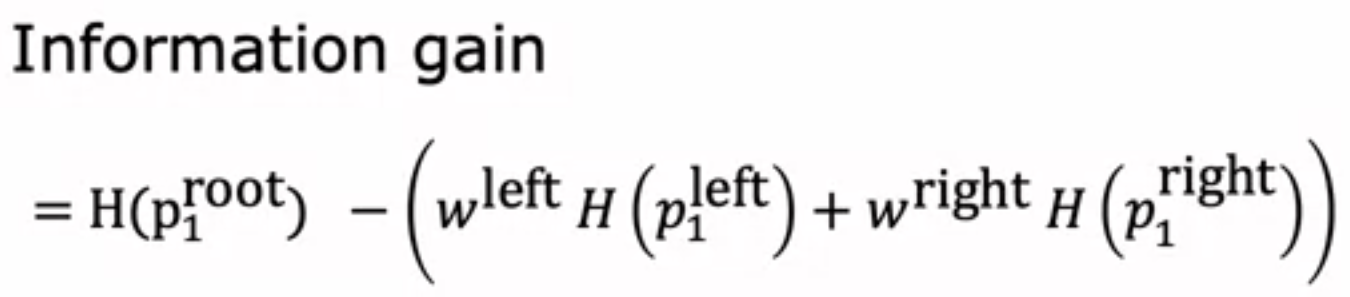

## Putting it all together

- Start with all examples at the root node.

- Calculate information gain for all possible features, and pick the one with the highest information gain.

- Split the data set according to the selected feature, and create left and right branches of the tree.

- Keep repeating the splitting process until the stopping criteria is met:

  - When a node is 100% one class.
  - When a split would cause the tree to exceed the maximum depth that you had set.
  - When the information gain from an additional splits is less than a threshold.
  - When the number of examples in a node is below a threshold.

In [31]:
# Full example

entropy(2/3) - ((1/3)*entropy(0) + (2/3)*entropy(.5))

0.2516291673878229